In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import numpy as np

# !pip install yfinance
import yfinance as  yF

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 15
m.rcParams['ytick.labelsize'] = 15
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 25,10


# #formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [299]:
cotacao = yF.Ticker('B3SA3.SA')

In [300]:
dados = cotacao.history(period='2y')
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-12 00:00:00-03:00,10.51,10.86,10.39,10.83,51902800,0.00,0.00
2022-01-13 00:00:00-03:00,10.70,10.94,10.69,10.81,41573700,0.00,0.00
2022-01-14 00:00:00-03:00,10.85,11.46,10.78,11.40,58924300,0.00,0.00
2022-01-17 00:00:00-03:00,11.38,11.74,11.30,11.53,34504100,0.00,0.00
2022-01-18 00:00:00-03:00,11.52,11.57,11.23,11.48,27785000,0.00,0.00


In [301]:
dados.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-08 00:00:00-03:00,13.86,14.31,13.85,14.28,27469900,0.00,0.00
2024-01-09 00:00:00-03:00,14.07,14.14,13.93,14.06,30342700,0.00,0.00
2024-01-10 00:00:00-03:00,14.05,14.18,13.90,13.92,20165800,0.00,0.00
2024-01-11 00:00:00-03:00,13.94,14.05,13.66,13.95,23289000,0.00,0.00
2024-01-12 00:00:00-03:00,14.00,14.24,13.96,14.10,24421600,0.00,0.00


In [302]:
dados = dados.drop(['Dividends', 'Stock Splits'], axis = 1)

In [303]:
dados.shape

(500, 5)

In [304]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2022-01-12 00:00:00-03:00 to 2024-01-12 00:00:00-03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    500 non-null    float64
 1   High    500 non-null    float64
 2   Low     500 non-null    float64
 3   Close   500 non-null    float64
 4   Volume  500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.4 KB


In [305]:
dados.describe()

,Open,High,Low,Close,Volume
count,500.00,500.00,500.00,500.00,500.00
mean,12.47,12.71,12.25,12.48,42024498.80
std,1.32,1.32,1.31,1.31,21330426.98
min,9.62,9.87,9.28,9.58,0.00
25%,11.44,11.64,11.19,11.44,28491575.00
50%,12.44,12.65,12.24,12.43,37532500.00
75%,13.47,13.78,13.28,13.51,50275900.00
max,15.19,15.42,14.96,15.24,276369600.00


In [306]:
print('Maior data:',dados.index.max())
print('Menor Data:', dados.index.min())

Maior data: 2024-01-12 00:00:00-03:00
Menor Data: 2022-01-12 00:00:00-03:00


In [307]:
display(dados.loc[dados.index.max()])

Open           14.00
High           14.24
Low            13.96
Close          14.10
Volume   24421600.00
Name: 2024-01-12 00:00:00-03:00, dtype: float64

In [308]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
retorno_diario = dados['Close'].pct_change().dropna()
retorno_diario

Date
2022-01-13 00:00:00-03:00   -0.00
2022-01-14 00:00:00-03:00    0.05
2022-01-17 00:00:00-03:00    0.01
2022-01-18 00:00:00-03:00   -0.00
2022-01-19 00:00:00-03:00   -0.00
                             ... 
2024-01-08 00:00:00-03:00    0.02
2024-01-09 00:00:00-03:00   -0.02
2024-01-10 00:00:00-03:00   -0.01
2024-01-11 00:00:00-03:00    0.00
2024-01-12 00:00:00-03:00    0.01
Name: Close, Length: 499, dtype: float64

In [309]:
dados = pd.merge(dados, retorno_diario, how = 'inner', on = 'Date')
dados.columns = ['Open','High','Lower','Close','Volume','Daily_Variation']
dados.head()

,Open,High,Lower,Close,Volume,Daily_Variation
Date,,,,,,
2022-01-13 00:00:00-03:00,10.70,10.94,10.69,10.81,41573700,-0.00
2022-01-14 00:00:00-03:00,10.85,11.46,10.78,11.40,58924300,0.05
2022-01-17 00:00:00-03:00,11.38,11.74,11.30,11.53,34504100,0.01
2022-01-18 00:00:00-03:00,11.52,11.57,11.23,11.48,27785000,-0.00
2022-01-19 00:00:00-03:00,11.60,11.65,11.43,11.44,28462100,-0.00


In [310]:
# Shape
dados.shape

(499, 6)

In [311]:
# Sumário estatístico
dados.describe()

,Open,High,Lower,Close,Volume,Daily_Variation
count,499.00,499.00,499.00,499.00,499.00,499.00
mean,12.48,12.72,12.26,12.48,42004702.61,0.00
std,1.31,1.32,1.31,1.31,21347234.15,0.03
min,9.62,9.87,9.28,9.58,0.00,-0.13
25%,11.45,11.64,11.20,11.45,28481750.00,-0.01
50%,12.45,12.65,12.24,12.43,37477400.00,0.00
75%,13.47,13.78,13.28,13.52,50270300.00,0.02
max,15.19,15.42,14.96,15.24,276369600.00,0.09


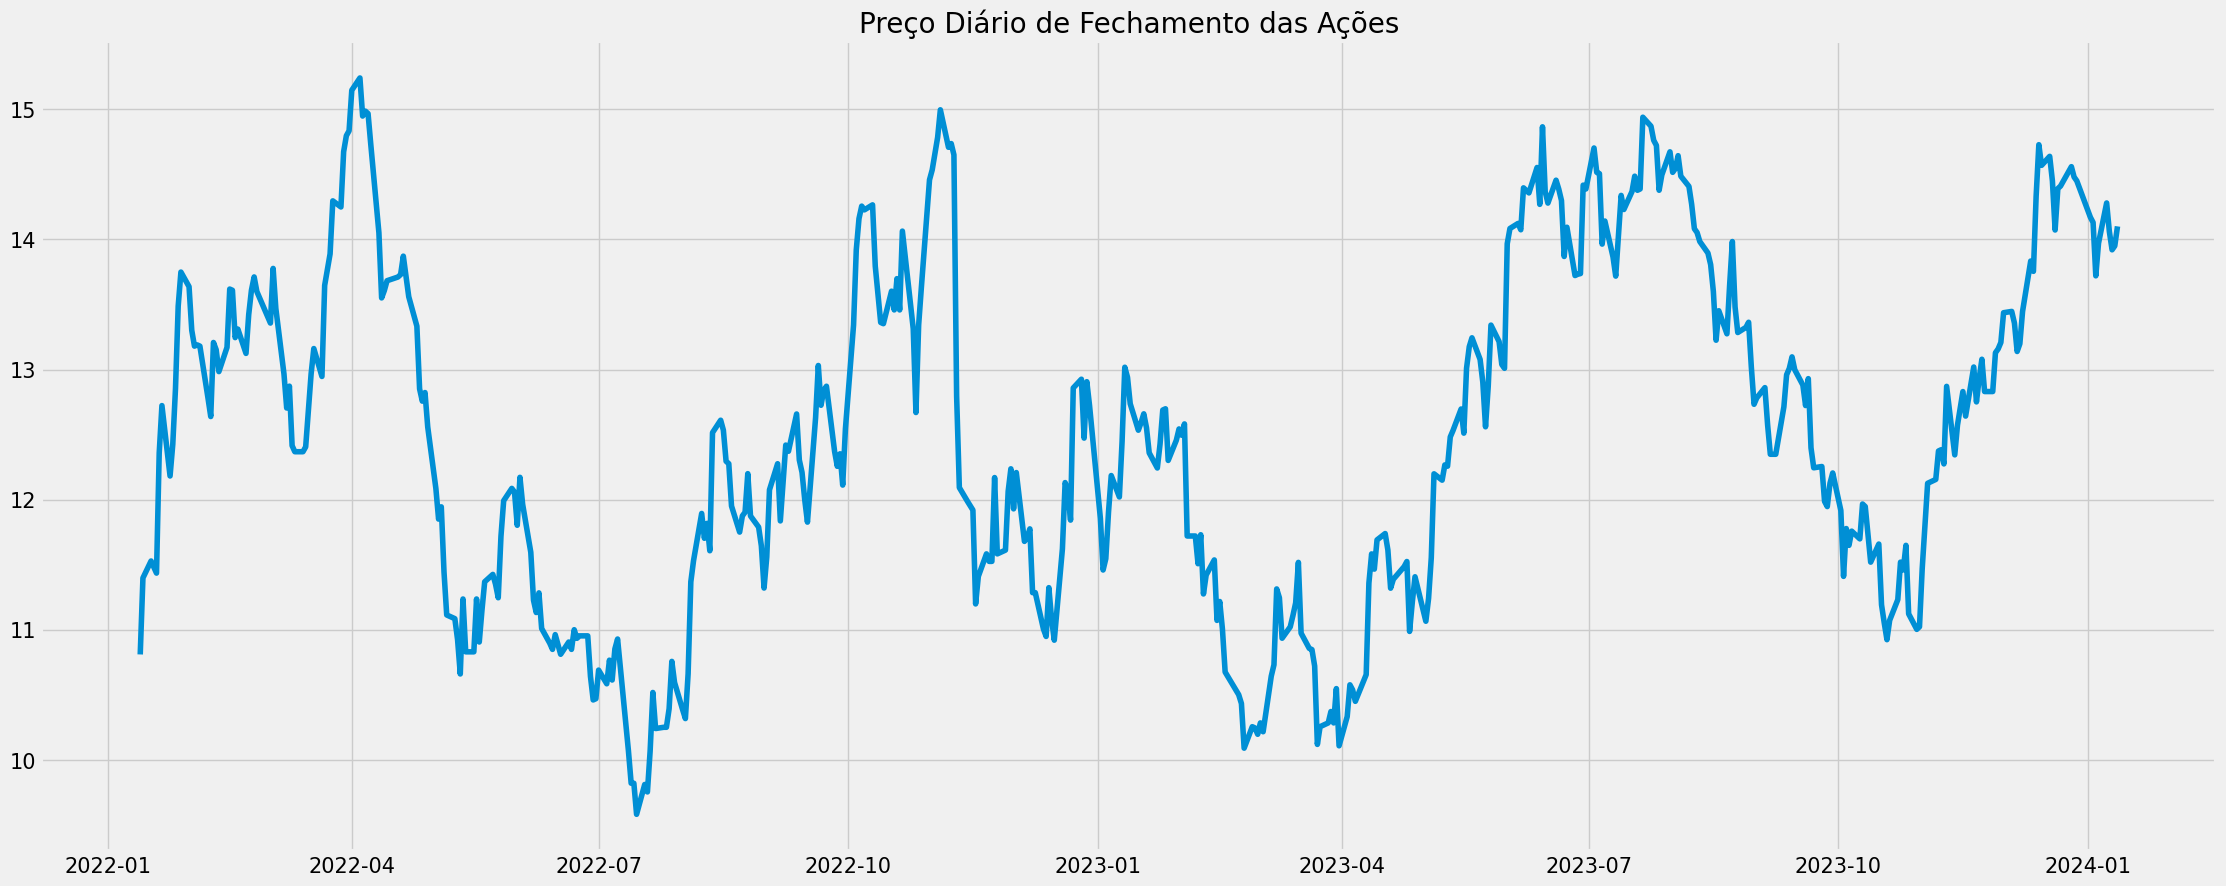

In [312]:
plt.plot(dados['Close'])
plt.title("Preço Diário de Fechamento das Ações", size = 20)
plt.show()

In [313]:
# Retorno acumulado
# Esse processo é comum em finanças para calcular o crescimento acumulado.
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

0.4073331169886234

In [314]:
# Média do fechamento diário da cotação das ações
media_retorno_diario = np.mean(retorno_diario)

In [315]:
# Desvio padrão do fechamento diário da cotação das ações
desvio_retorno_diario = np.std(retorno_diario)

In [316]:
# Média e desvio padrão
print("Média do Retorno de Fechamento:", media_retorno_diario)
print("Desvio Padrão do Retorno de Fechamento:", desvio_retorno_diario)

Média do Retorno de Fechamento: 0.0008457065584093651
Desvio Padrão do Retorno de Fechamento: 0.02517692983456204


In [317]:
# Média e desvio padrão nos 3 anos (considerando 754 dias de operações)
print("Retorno Médio Anualizado de Fechamento:", (1 + media_retorno_diario) ** dados.shape[0] - 1)
print("Desvio Padrão Anualizado de Fechamento:", desvio_retorno_diario*np.sqrt(dados.shape[0]))

Retorno Médio Anualizado de Fechamento: 0.5247481149702264
Desvio Padrão Anualizado de Fechamento: 0.5624100107140125


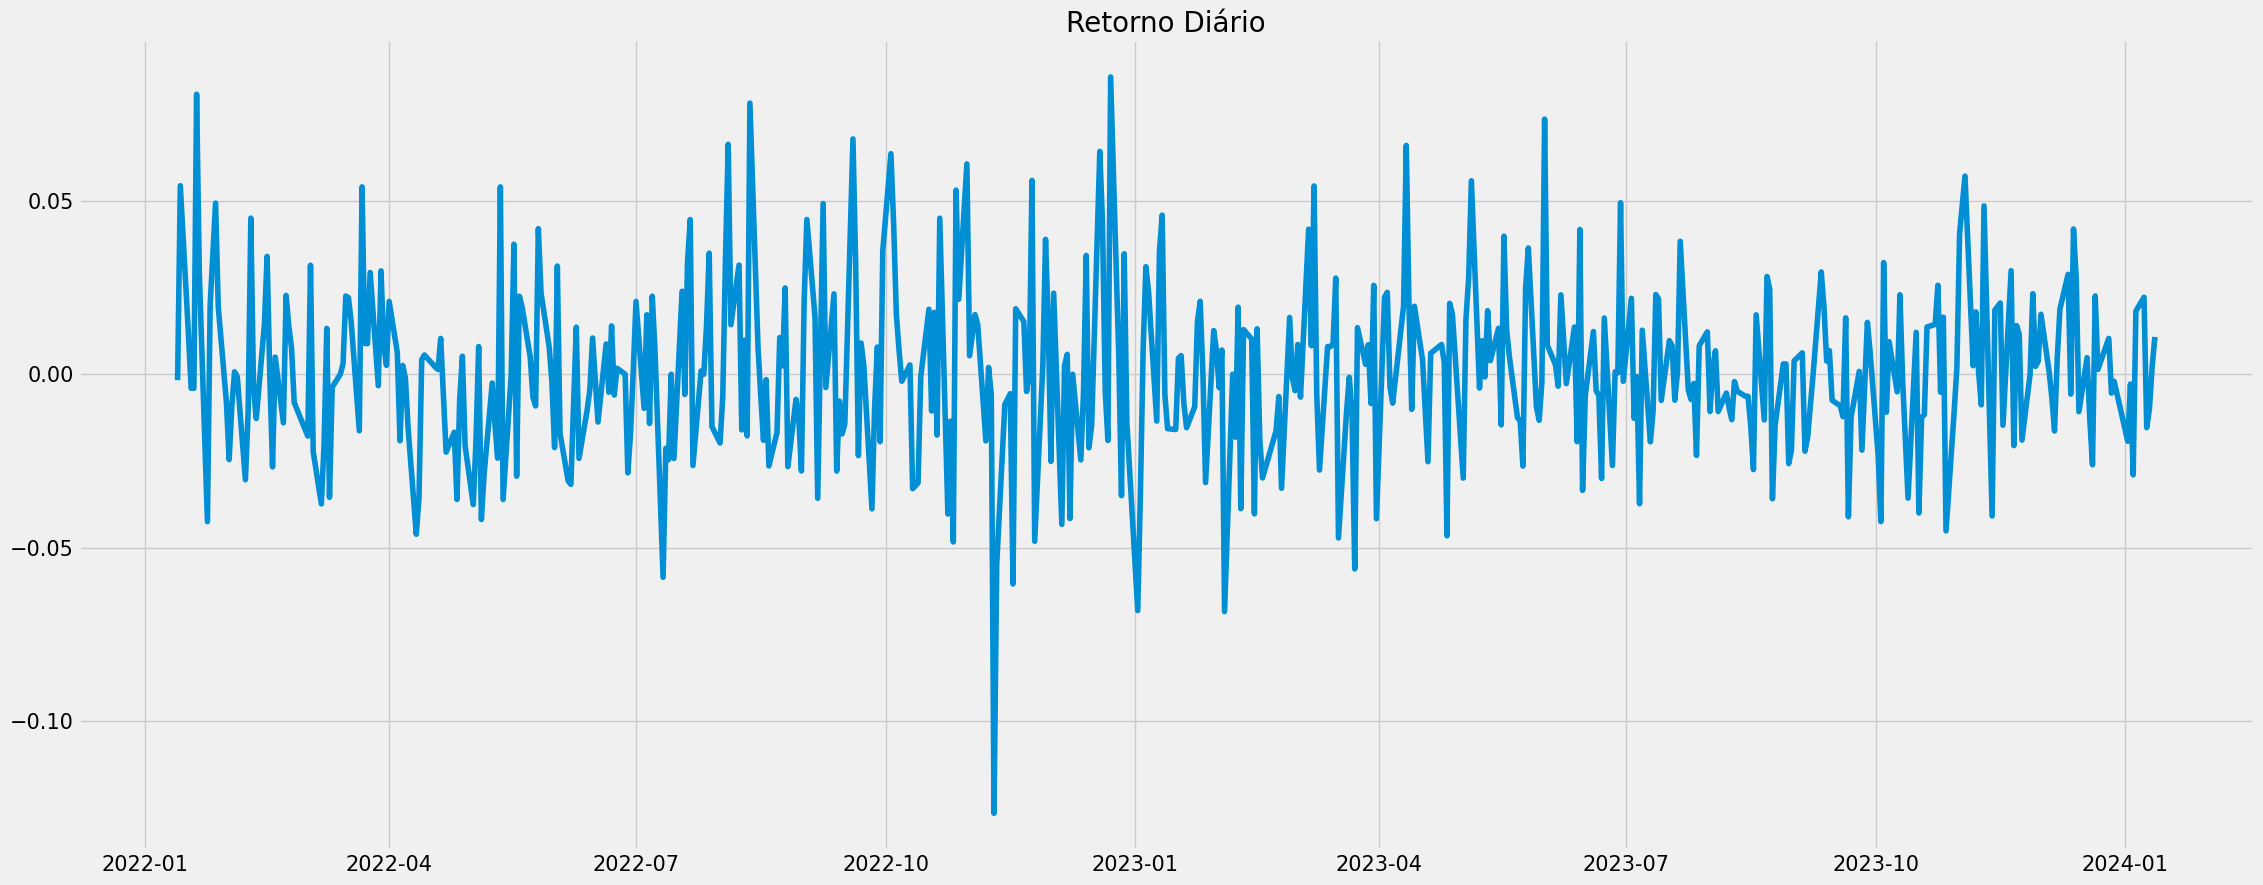

In [318]:
plt.plot(retorno_diario)
plt.title("Retorno Diário", size = 20)
plt.show()

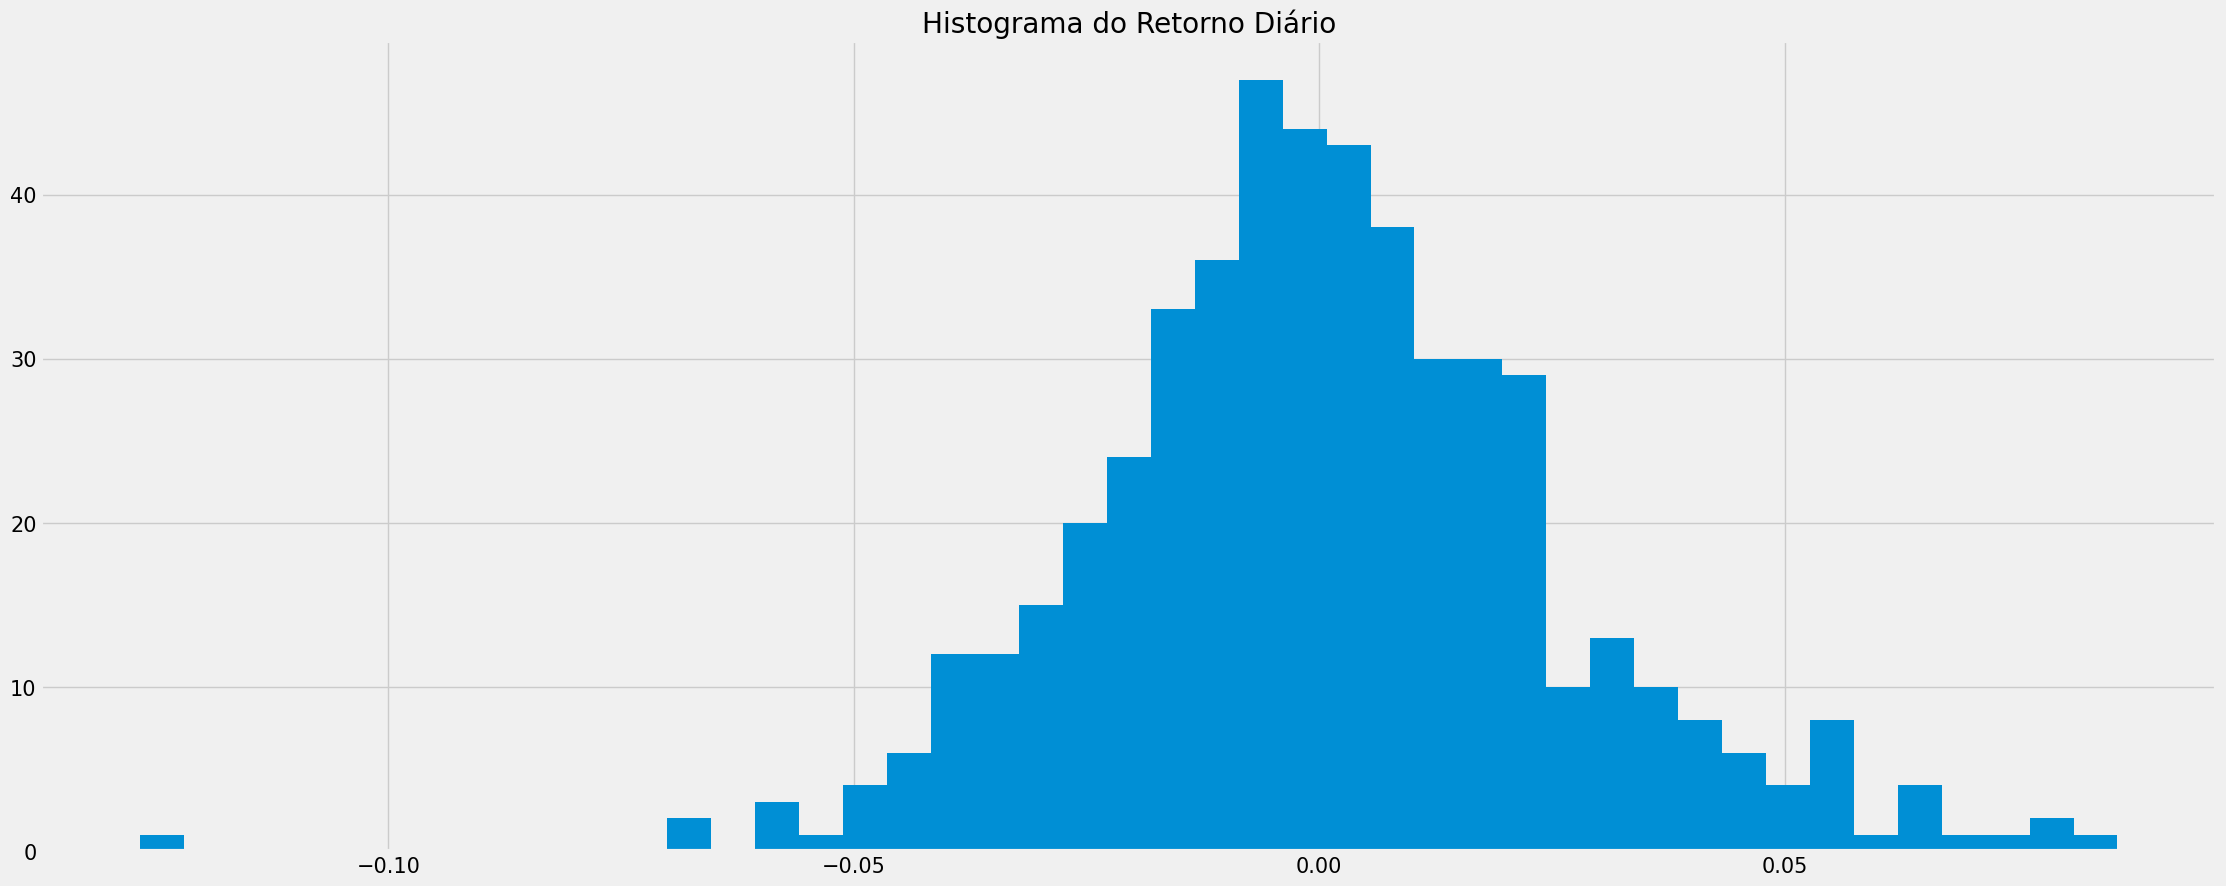

In [319]:
plt.hist(retorno_diario, bins=45)
plt.title('Histograma do Retorno Diário')
plt.show()

In [320]:
# Transformação de log e diferenciação para cálculo do retorno diário
log_retorno_diario = (np.log(dados["Close"]) - np.log(dados["Close"]).shift(-1)).dropna()

# Calculamos média e desvio padrão após a transformação
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

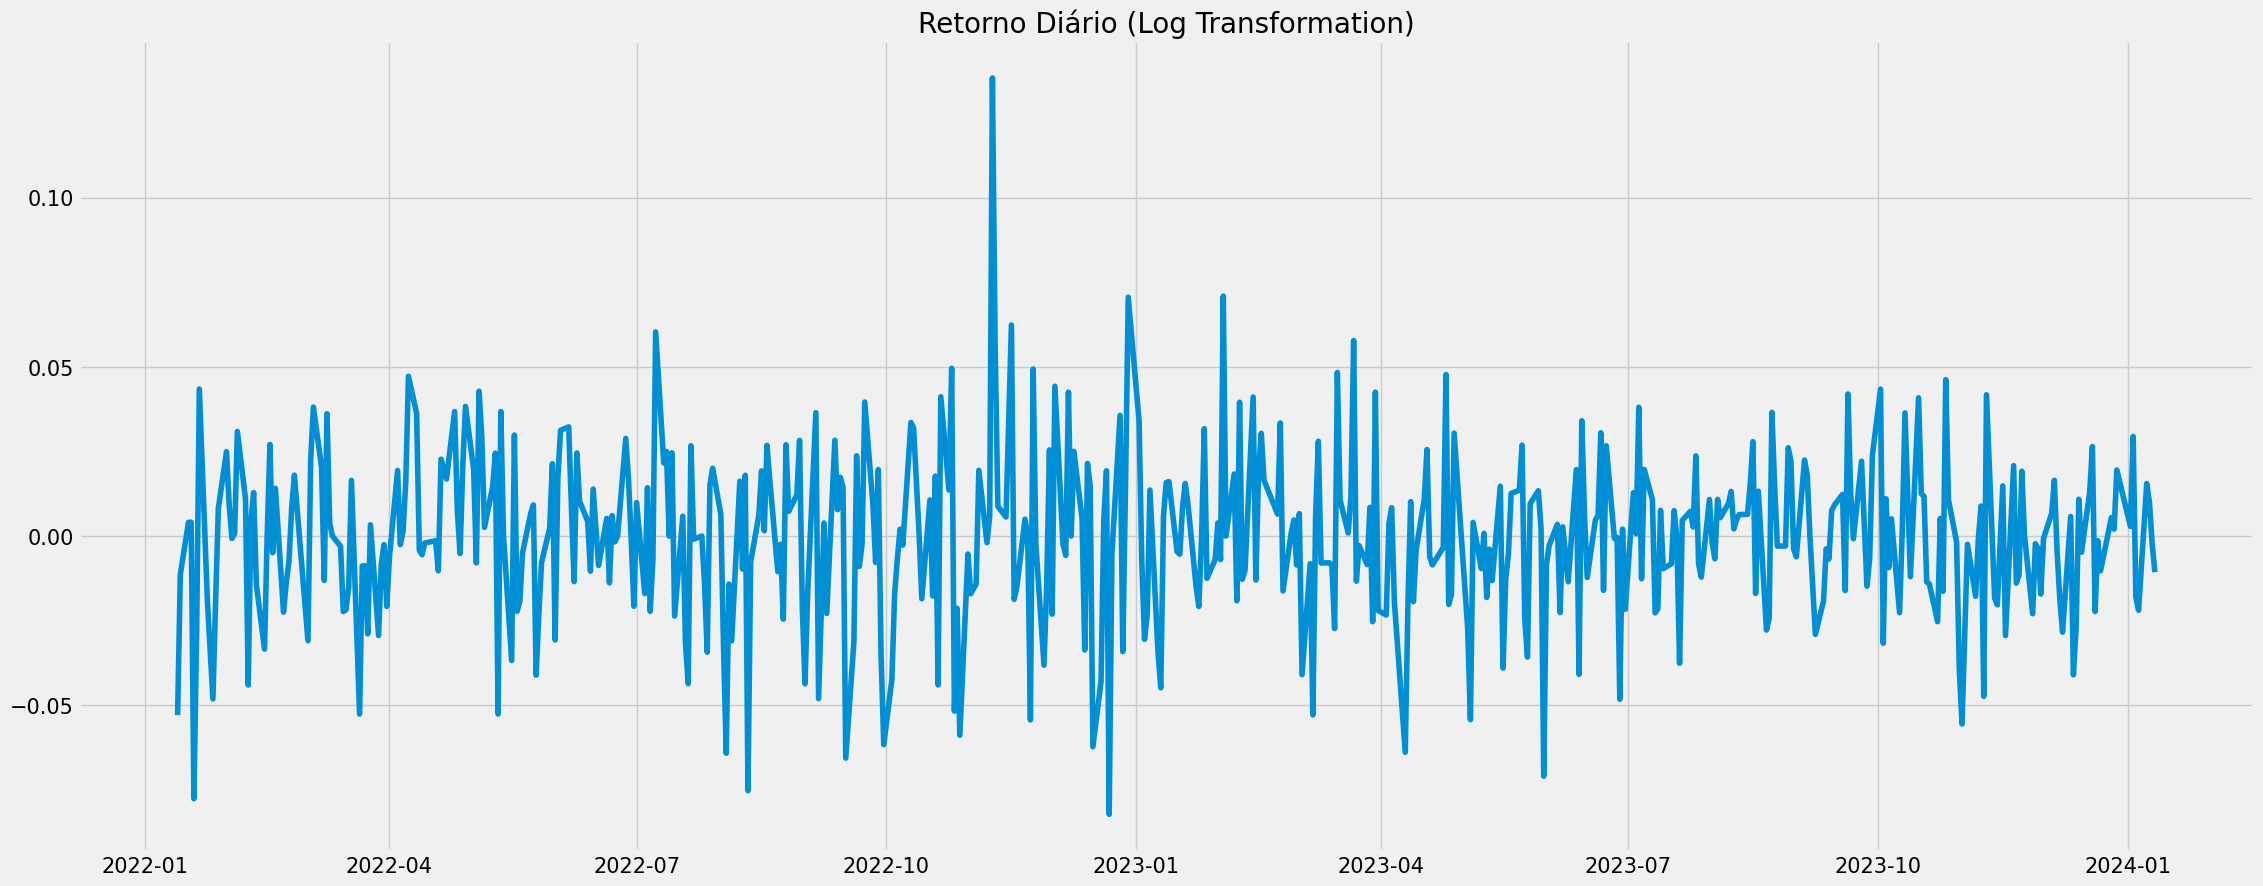

In [321]:
plt.plot(log_retorno_diario)
plt.title("Retorno Diário (Log Transformation)", size = 20)
plt.show()

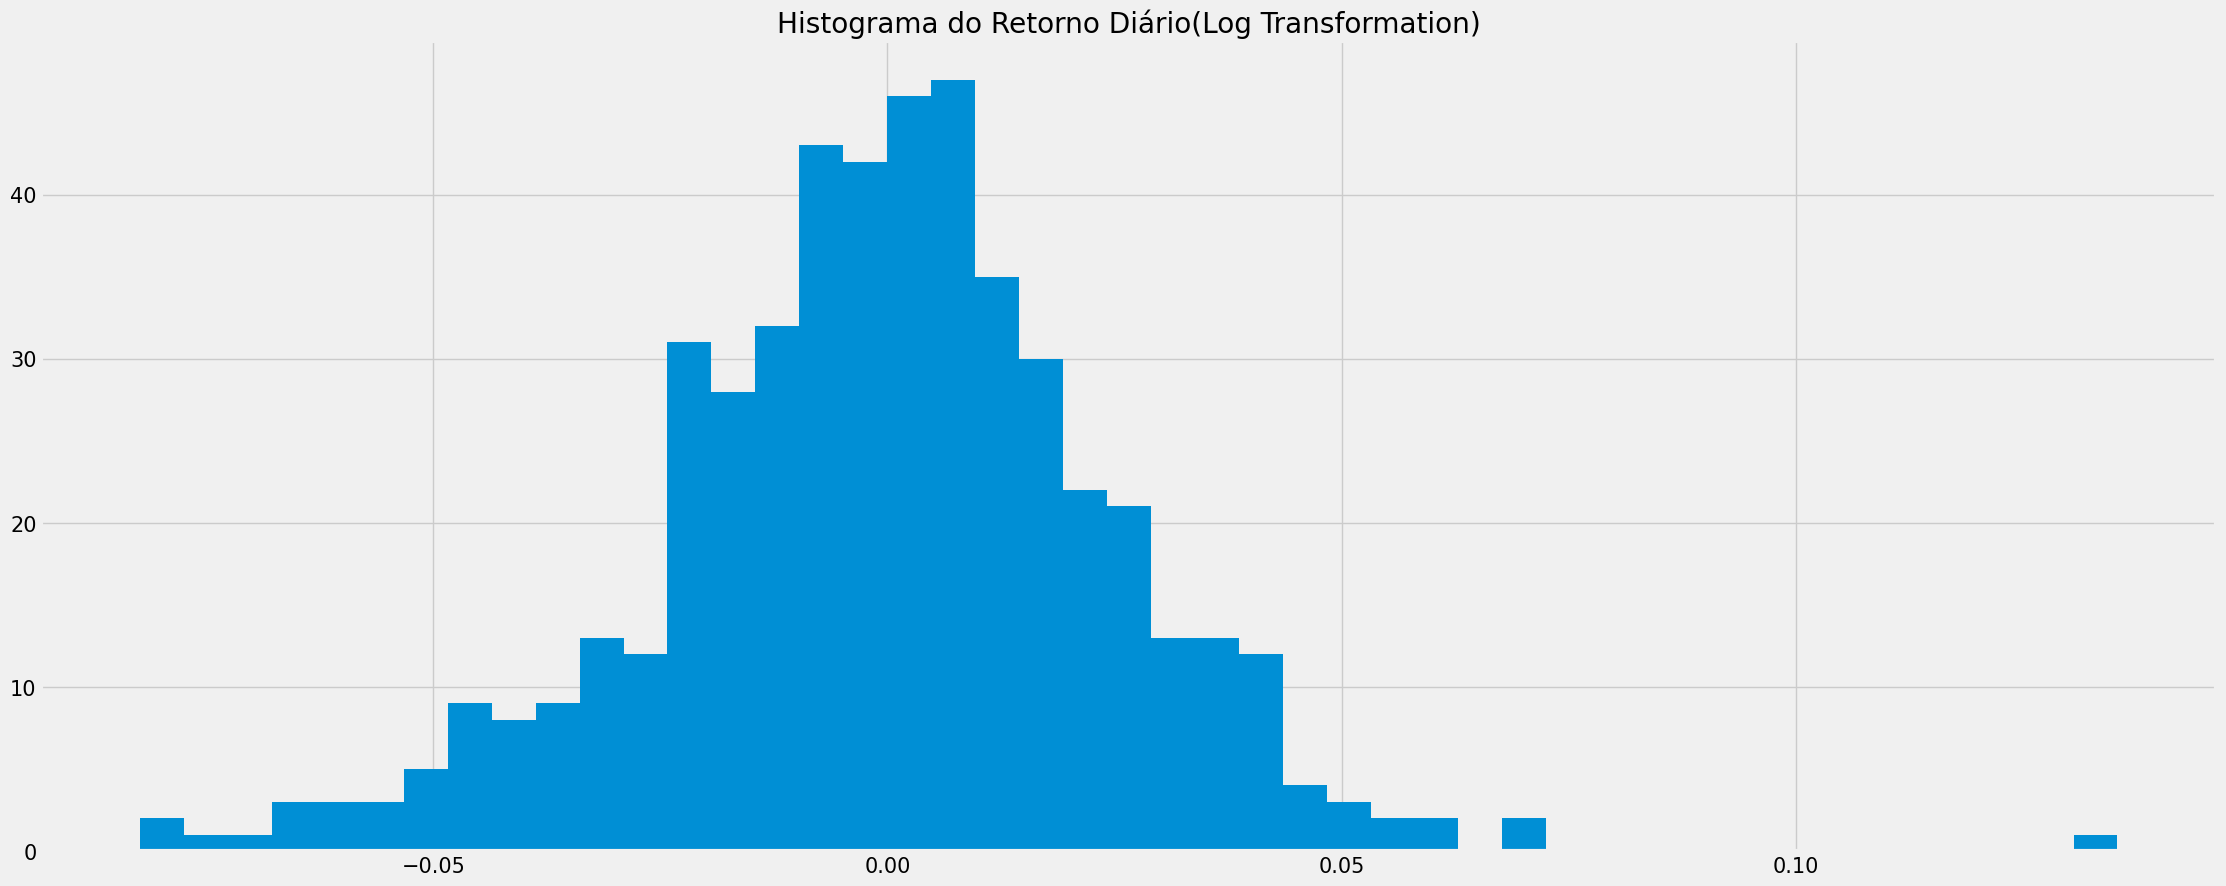

In [322]:
plt.hist(log_retorno_diario, bins=45)
plt.title('Histograma do Retorno Diário(Log Transformation)')
plt.show()

In [323]:
variancia = np.sum((log_retorno_diario-media_retorno_diario)**2)/log_retorno_diario.count()
variancia

0.0006363294005141206

In [324]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.")
print("VAR 95%:", var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VAR 95%: -0.04371429655208434


In [325]:
# Var para os próximos 5 dias
var * np.sqrt(5)

-0.09774813867904528

In [326]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos piores 1% dos casos, as perdas foram, em média, superiores ao percentual histórico.")
print("CVaR 95%:", cvar)

Nos piores 1% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVaR 95%: -0.05738495820694771


# Monte Carlo Simulation

In [330]:
# Simulação de Monte Carlo

# Número de dias a frente
dias_posteriores = 60

# Número de simulações
simulacoes = 100

# Último valor da ação
ultimo_preco = dados['Close'].tail().values[-1]

# Cria um array vazio com as dimensões 
results = np.empty((simulacoes, dias_posteriores))

# Loop por cada simulação
for s in range(simulacoes):
    
    # Calcula o retorno com dados randômicos seguindo uma distribuição normal
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario, 
                                          scale = log_desvio_retorno_diario, 
                                          size = dias_posteriores)
    
    result = ultimo_preco * (random_returns.cumprod())
    
    results[s, :] = result

In [331]:
# Definindo o índice da série simulada
dia_posterior_ultima_data = dados.index.max() + pd.Timedelta(days=1)

index = pd.date_range(dia_posterior_ultima_data, periods = dias_posteriores, freq = "D")

resultados = pd.DataFrame(results.T, index = index)

media_resultados = resultados.apply("mean", axis = 1)

# Resultado

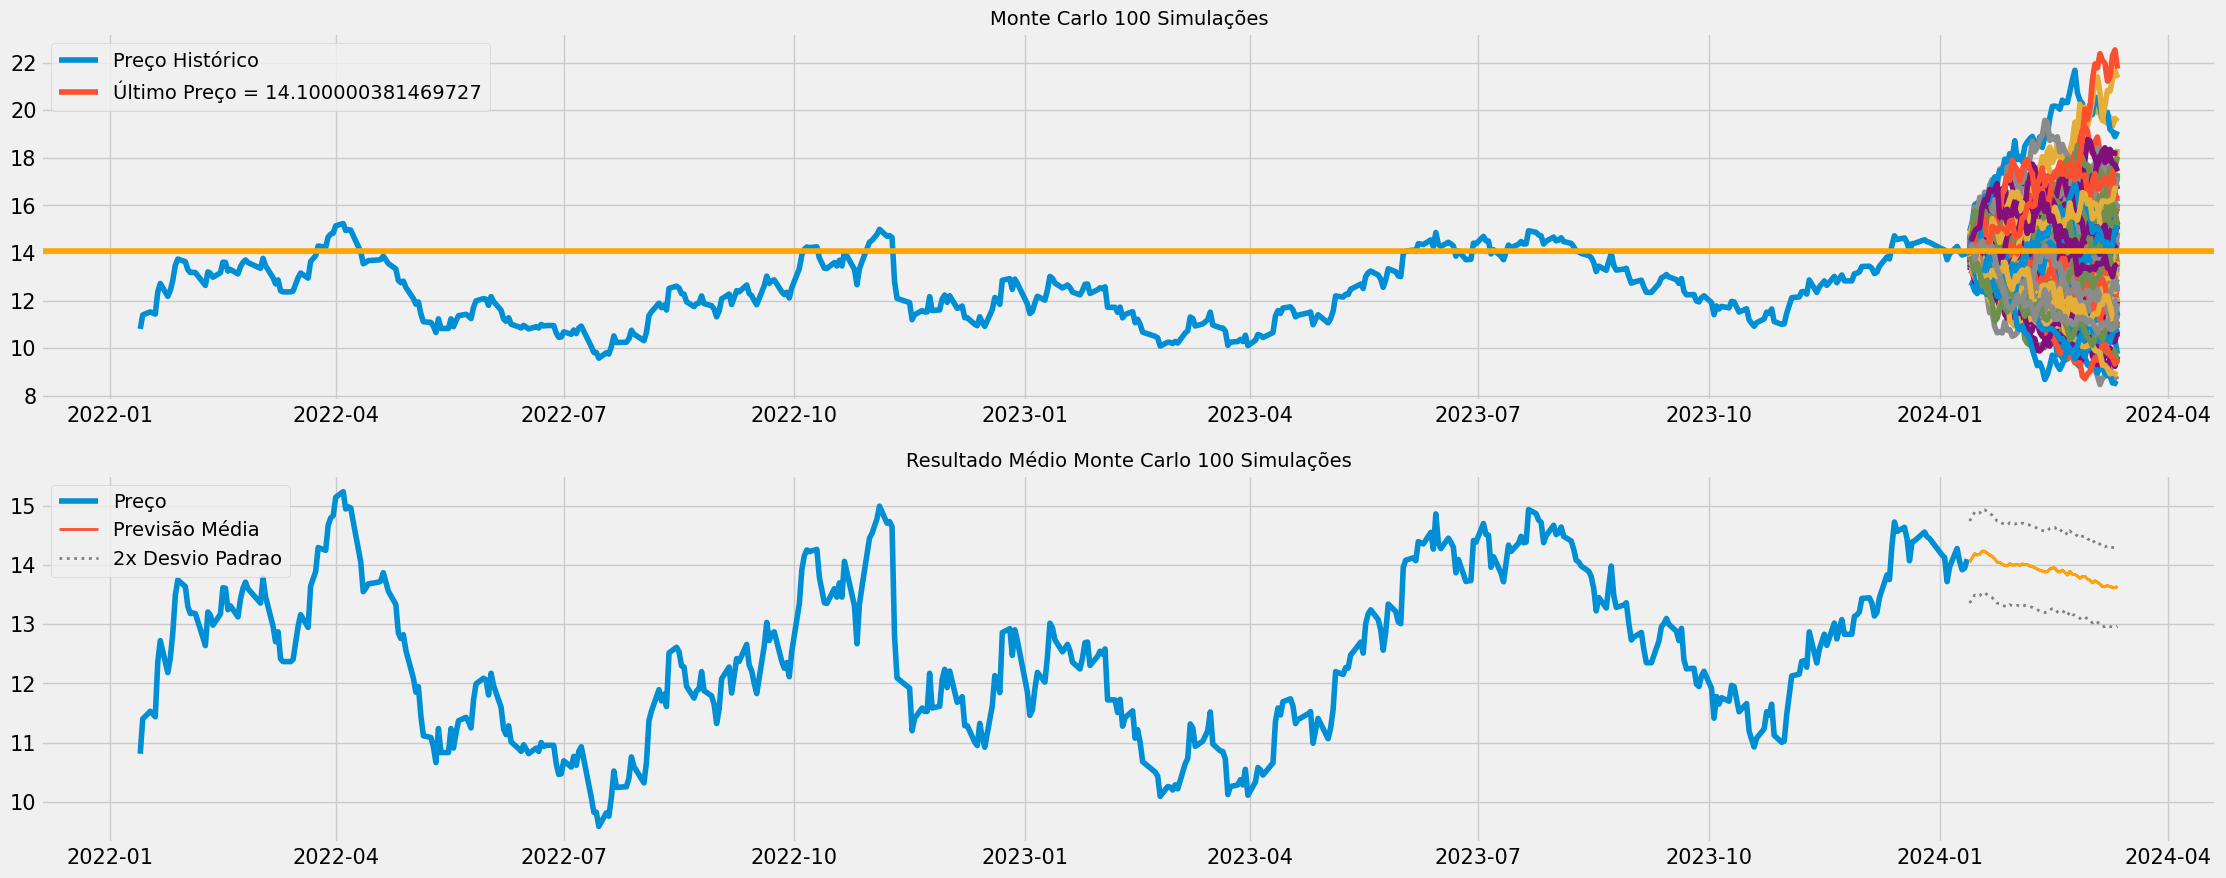

In [332]:
# Dividindo a área de plotagem em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados['Close'][:dados.index.max()])

ax[0].plot(resultados)

ax[0].axhline(ultimo_preco, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Histórico", f"Último Preço = {ultimo_preco}"])



ax[1].plot(dados["Close"][:dados.index.max() + pd.Timedelta(days=180)])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), 
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado Médio Monte Carlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()

In [336]:
df1 = dados

In [337]:
df1

,Open,High,Lower,Close,Volume,Daily_Variation
Date,,,,,,
2022-01-13 00:00:00-03:00,10.70,10.94,10.69,10.81,41573700,-0.00
2022-01-14 00:00:00-03:00,10.85,11.46,10.78,11.40,58924300,0.05
2022-01-17 00:00:00-03:00,11.38,11.74,11.30,11.53,34504100,0.01
2022-01-18 00:00:00-03:00,11.52,11.57,11.23,11.48,27785000,-0.00
2022-01-19 00:00:00-03:00,11.60,11.65,11.43,11.44,28462100,-0.00
...,...,...,...,...,...,...
2024-01-08 00:00:00-03:00,13.86,14.31,13.85,14.28,27469900,0.02
2024-01-09 00:00:00-03:00,14.07,14.14,13.93,14.06,30342700,-0.02
2024-01-10 00:00:00-03:00,14.05,14.18,13.90,13.92,20165800,-0.01


In [341]:
df2 = df1['Close']

In [348]:
import numpy as np
import pandas as pd

def monte_carlo_time_series(data, num_simulations, forecast_horizon):
    """
    Perform Monte Carlo simulation on time series data.

    Parameters:
    data (pd.DataFrame): Time series data.
    num_simulations (int): Number of simulations to run.
    forecast_horizon (int): Number of periods to forecast.

    Returns:
    pd.DataFrame: Monte Carlo simulation results.
    """
    returns = data.pct_change().dropna()
    last_price = data.iloc[-1]
    results = pd.DataFrame()
    for i in range(num_simulations):
        prices = [last_price]
        for j in range(forecast_horizon):
            price = prices[-1] * (1 + np.random.choice(returns))
            prices.append(price)
        results[f"Simulation {i+1}"] = prices[1:]
    return results
results = results

In [346]:
monte_carlo_time_series(df2, 100, 60)

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 91,Simulation 92,Simulation 93,Simulation 94,Simulation 95,Simulation 96,Simulation 97,Simulation 98,Simulation 99,Simulation 100
0,14.02,13.43,14.33,14.38,14.13,14.01,13.53,13.93,14.17,14.52,...,14.22,13.96,13.68,14.22,14.35,14.21,14.28,14.63,14.35,14.02
1,13.91,13.24,14.33,14.55,13.93,14.64,13.52,13.69,14.20,14.29,...,14.26,14.19,13.75,14.00,14.39,14.63,14.68,14.41,13.76,14.65
2,13.93,13.13,14.75,14.96,13.37,15.45,14.34,13.14,14.25,14.23,...,14.46,13.92,14.06,14.09,14.59,15.14,15.29,13.98,13.50,15.08
3,13.96,12.67,14.52,15.18,13.37,15.54,14.00,13.44,14.19,14.24,...,15.24,14.33,13.84,13.79,14.40,14.69,15.19,13.30,13.28,14.72
4,14.06,12.47,14.33,15.12,13.37,15.33,13.63,13.47,14.49,13.69,...,15.49,14.34,14.06,13.78,14.59,14.65,15.02,14.15,13.10,14.83
5,13.98,12.47,13.88,15.03,13.40,15.68,13.59,13.31,14.80,13.40,...,16.14,14.40,13.55,13.79,14.94,14.56,14.95,14.11,13.41,14.81
6,14.00,12.48,14.44,15.84,14.01,14.93,13.68,13.73,15.10,13.21,...,16.86,14.46,13.36,14.13,14.74,14.56,14.99,14.08,13.71,14.69
7,14.45,12.42,13.88,15.91,13.45,14.80,13.46,13.51,14.83,13.12,...,16.84,14.18,13.85,14.05,14.18,14.54,14.97,13.99,13.89,14.98
8,14.26,12.18,13.76,16.02,13.25,15.08,13.14,13.24,15.24,13.13,...,17.08,14.25,14.00,14.10,14.18,15.32,14.70,14.00,14.09,14.98
9,13.28,12.38,13.98,15.70,13.51,14.99,14.01,13.24,15.25,13.08,...,17.24,14.39,14.30,14.37,14.08,15.02,14.47,14.85,13.62,14.57


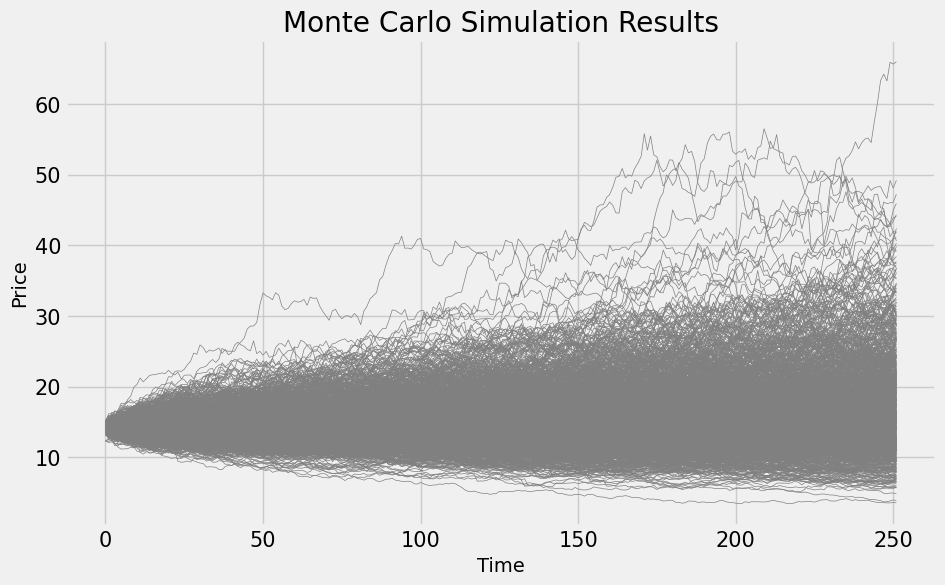

In [349]:
import matplotlib.pyplot as plt

def plot_simulation_results(results):
    """
    Plot Monte Carlo simulation results.

    Parameters:
    results (pd.DataFrame): Monte Carlo simulation results.
    """
    plt.figure(figsize=(10,6))
    for i in results.columns:
        plt.plot(results[i], color='gray', linewidth=0.5)
    plt.title('Monte Carlo Simulation Results')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

# Plot the simulation results
plot_simulation_results(results)
